In [32]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pandas import DataFrame

In [4]:
train_df = pd.read_csv("sphericitydata.csv")


In [28]:
train_df.iloc[:,1:7] 

,finalCellSpher2,finalCellSpher3,finalCellSpher4,finalCellSpher5,finalCellSpher6,finalCellSpher7
0,0.505127,0.857141,0.876778,0.984092,0.920125,0.959439
1,0.605390,0.881266,0.982460,0.774749,0.935156,0.999999
2,0.499561,0.675291,0.977331,0.994918,0.867762,0.998760
3,0.760575,0.959829,0.896614,0.998525,0.940804,0.988058
4,0.499771,0.899175,0.966729,0.967089,0.342273,0.995880
5,0.734160,0.924455,0.691003,0.999028,0.996599,0.984137
6,0.605806,0.972755,0.696295,0.820166,0.971708,0.770783
7,0.515325,0.954277,0.999745,0.971253,0.973509,0.982862
8,0.535758,0.525637,0.993141,0.812874,0.998230,0.981545
9,0.554363,0.483890,0.984530,0.995426,0.977243,0.872701


In [107]:
train_X = train_df.iloc[:,1:7] 

train_y_letters = train_df.iloc[:,0:1]

sc = StandardScaler()
train_X = sc.fit_transform(train_X)

pca = PCA()
train_X = pca.fit_transform(train_X)

dummy_y= train_y_letters
n_cols  = train_X.shape[1]
model = Sequential()
model.add(Dense(40, activation="relu", input_shape=(n_cols,)))
model.add(Dense(40, activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(1,activation="linear"))
model.compile(optimizer='adam', loss='mean_squared_error')
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=4)
#train model
model.fit(train_X, dummy_y, validation_split=0.2, epochs=1000, callbacks=[early_stopping_monitor], verbose = 0)
ynew = model.predict(train_X)
diff = abs(ynew - dummy_y)
dummy_y['predicted'] = ynew
dummy_y = DataFrame(dummy_y, columns= ['sphericity','predicted']).sort_values(by=['sphericity'])

C:\Users\HeavyRain350\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<function matplotlib.pyplot.show(*args, **kw)>

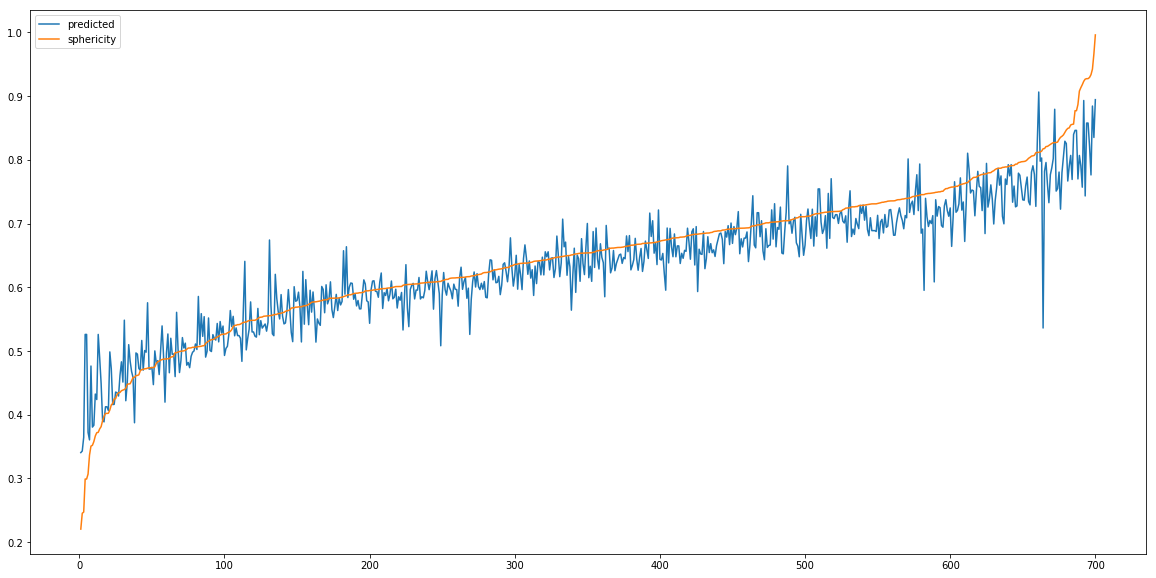

In [108]:
plt.figure(figsize=(20,10))
plt.plot(range(1,701),dummy_y['predicted'], label="predicted")
plt.plot(range(1,701),dummy_y['sphericity'], label="sphericity")
plt.legend(loc="upper left")
plt.show

In [66]:
dummy_y

,sphericity,predicted
620,0.220574,0.371391
693,0.245438,0.430145
692,0.247254,0.397487
619,0.299107,0.544821
624,0.299108,0.544821
167,0.306930,0.381955
444,0.336632,0.387120
658,0.350812,0.550721
477,0.352029,0.439428
358,0.357940,0.385684
